In [181]:
# 딥러닝 유관장
import numpy as np
import tensorflow as tf
import pandas as pd

In [182]:
from sklearn.preprocessing import MinMaxScaler #필드별 사이즈 조절 0과 1사이에 위치하도록함
from sklearn.preprocessing import StandardScaler #표준편차기준으로 균형잡힌 분포설계

file_list = ['금리', '무역지수', '실업률', '환율', '주식예탁금']

In [183]:
# x_train
train_x = np.array([])
test_x = np.array([])
original_x = np.array([])

for file_name in file_list:
    readfile = pd.read_csv(file_name+'.csv')
    
    # tensorflow는 numpy와 친하다
    npdata = np.array(readfile)
        
    # 필요한 데이터만 잘라쓰자
    npdata_d = npdata[:,0:2] #일자
    npdata_v = npdata[:,1:2] #값
    
    # 훈련데이터와 테스트데이터로 분리해야한다
    npdata_v_train = npdata_v[1:200] #훈련데이터셋
    npdata_v_test = npdata_v[200:] #테스트데이터셋
    
    # 훈련데이터 정규화
    train_mms = MinMaxScaler()
    train_ss = StandardScaler()
    
    train_mms.fit(npdata_v_train)
    npdata_v_train = train_mms.transform(npdata_v_train)

    train_ss.fit(npdata_v_train)
    npdata_v_train = train_ss.transform(npdata_v_train)
    
    # 훈련데이터셋 생성
    if train_x.size == 0:
        train_x = npdata_v_train
    else:
        train_x = np.concatenate((train_x, npdata_v_train), axis=1)
    
    # 테스트데이터 정규화
    test_mms = MinMaxScaler()
    test_ss = StandardScaler()

    test_mms.fit(npdata_v_test)
    npdata_v_test = train_mms.transform(npdata_v_test)

    test_ss.fit(npdata_v_test)
    npdata_v_test = train_ss.transform(npdata_v_test)
                
    #테스트데이터셋 생성
    if test_x.size == 0:
        test_x = npdata_v_test
    else:
        test_x = np.concatenate((test_x, npdata_v_test), axis=1)
        
    
    # 원본데이터 정규화
    original_mms = MinMaxScaler()
    original_ss = StandardScaler()

    original_mms.fit(npdata_v)
    npdata_v = train_mms.transform(npdata_v)

    test_ss.fit(npdata_v)
    npdata_v = train_ss.transform(npdata_v)
                
    # 원본데이터셋 생성
    if original_x.size == 0:
        original_x = npdata_v
    else:
        original_x = np.concatenate((original_x, npdata_v), axis=1)
        
train_x.shape, test_x.shape, original_x.shape

((199, 5), (45, 5), (245, 5))

In [184]:
# y_train
train_y = np.array([])
test_y = np.array([])
original_y = np.array([])

readfile = pd.read_csv('주가.csv')

# tensorflow는 numpy와 친하다
npdata = np.array(readfile)

# 필요한 데이터만 잘라쓰자
npdata_d = npdata[:,0:2] #일자
npdata_v = npdata[:,1:2] #값

# 훈련데이터와 테스트데이터로 분리해야한다
npdata_v_train = npdata_v[1:200] #훈련데이터셋
npdata_v_test = npdata_v[200:] #테스트데이터셋

# 훈련데이터 정규화
train_mms = MinMaxScaler()
train_ss = StandardScaler()

train_mms.fit(npdata_v_train)
npdata_v_train = train_mms.transform(npdata_v_train)

train_ss.fit(npdata_v_train)
npdata_v_train = train_ss.transform(npdata_v_train)

# 테스트데이터 정규화
test_mms = MinMaxScaler()
test_ss = StandardScaler()

test_mms.fit(npdata_v_test)
npdata_v_test = train_mms.transform(npdata_v_test)

test_ss.fit(npdata_v_test)
npdata_v_test = train_ss.transform(npdata_v_test)

# 원본데이터 정규화
original_mms = MinMaxScaler()
original_ss = StandardScaler()

original_mms.fit(npdata_v)
npdata_v = train_mms.transform(npdata_v)

test_ss.fit(npdata_v)
npdata_v = train_ss.transform(npdata_v)

train_y = npdata_v_train
test_y = npdata_v_test
original_y = npdata_v

train_y.shape, test_y.shape, original_y.shape

((199, 1), (45, 1), (245, 1))

In [185]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=152, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=139, activation='relu'),
    tf.keras.layers.Dense(units=126, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

In [186]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss='mse')  # 학습률(러닝레이트) 와 loss펑션으로 평균제곱오차 사용
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 152)               912       
_________________________________________________________________
dropout_16 (Dropout)         (None, 152)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 139)               21267     
_________________________________________________________________
dense_66 (Dense)             (None, 126)               17640     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 127       
Total params: 39,946
Trainable params: 39,946
Non-trainable params: 0
_________________________________________________________________


In [187]:
history = model.fit(
    train_x, train_y, 
    epochs = 6000,                # 학습수행횟수
    batch_size=50,                # 한번에 입력할 표본수
    validation_split=0.2,         # 유효성 테스트 비중
    verbose=1,                    # 콘솔표출 내용 ( 0 = 없음, 1 = 프로그래스바, 2 = epochs마다)
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss')]  #성능증가가 일어나지않는횟수 10번
)

Epoch 1/6000
4/4 [==============================] - 0s 32ms/step - loss: 0.9525 - val_loss: 1.1255
Epoch 2/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.9372 - val_loss: 1.1215
Epoch 3/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.9286 - val_loss: 1.1177
Epoch 4/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.9285 - val_loss: 1.1138
Epoch 5/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.9191 - val_loss: 1.1098
Epoch 6/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.9260 - val_loss: 1.1060
Epoch 7/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.9180 - val_loss: 1.1021
Epoch 8/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.9157 - val_loss: 1.0985
Epoch 9/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.9093 - val_loss: 1.0945
Epoch 10/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.9013 - val_loss: 1.0908
Epoch 11/6000
4/4

Epoch 84/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6330 - val_loss: 0.7417
Epoch 85/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6263 - val_loss: 0.7366
Epoch 86/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6281 - val_loss: 0.7320
Epoch 87/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6265 - val_loss: 0.7274
Epoch 88/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6180 - val_loss: 0.7220
Epoch 89/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6146 - val_loss: 0.7163
Epoch 90/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6179 - val_loss: 0.7109
Epoch 91/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6046 - val_loss: 0.7054
Epoch 92/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6139 - val_loss: 0.7003
Epoch 93/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6034 - val_loss: 0.6952
Epoch 94/6

4/4 [==============================] - 0s 8ms/step - loss: 0.4012 - val_loss: 0.3236
Epoch 167/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4030 - val_loss: 0.3192
Epoch 168/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3940 - val_loss: 0.3150
Epoch 169/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3895 - val_loss: 0.3109
Epoch 170/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3818 - val_loss: 0.3066
Epoch 171/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3906 - val_loss: 0.3023
Epoch 172/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3881 - val_loss: 0.2980
Epoch 173/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3865 - val_loss: 0.2940
Epoch 174/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3925 - val_loss: 0.2902
Epoch 175/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3844 - val_loss: 0.2863
Epoch 176/6000


Epoch 248/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2470 - val_loss: 0.1156
Epoch 249/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2493 - val_loss: 0.1155
Epoch 250/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2459 - val_loss: 0.1154
Epoch 251/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2533 - val_loss: 0.1152
Epoch 252/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2513 - val_loss: 0.1152
Epoch 253/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2520 - val_loss: 0.1150
Epoch 254/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2571 - val_loss: 0.1150
Epoch 255/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2444 - val_loss: 0.1151
Epoch 256/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2406 - val_loss: 0.1154
Epoch 257/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2400 - val_loss: 0.1156


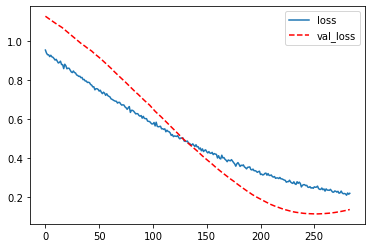

In [188]:
import matplotlib.pyplot as plt   # 그림그리자

plt.plot(history.history['loss'], label='loss')    # 훈련손실값
plt.plot(history.history['val_loss'], 'r--', label='val_loss') # 검증손실값
plt.legend()
plt.show()

In [189]:
# 결과도출
result = model.predict(original_x)

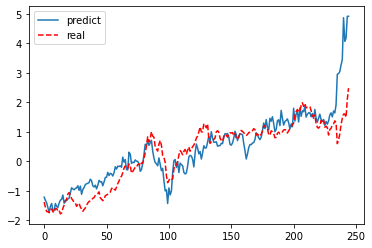

In [190]:
plt.plot(result, label='predict')    # 훈련손실값
plt.plot(original_y, 'r--', label='real') # 검증손실값
plt.legend()
plt.show()